In [24]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools,viz_tools,tidetools)
from salishsea_tools import visualisations as vis
%matplotlib inline

In [3]:
gridU = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notideeror_U.nc')
u = gridU.variables['vozocrtx']
u.shape
gridV = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notideeror_V.nc')
v = gridV.variables['vomecrty']

In [4]:
## my subdomain
u[-1,:,34,108]

array([-0.76251632, -0.71373665, -0.48310366, -0.17504436, -0.21172519,
       -0.04555666,  0.20565833,  0.11068027,  0.08220058,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)

(48.95, 49.3)

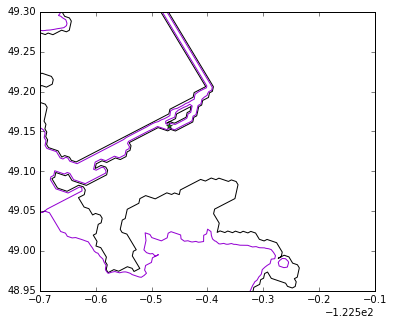

In [5]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][380:510,240:397]
Y = grid6.variables['nav_lat'][380:510,240:397]
bathy = grid6.variables['Bathymetry'][380:510,240:397]

fig, ax = plt.subplots(1,1,figsize = (6,5))
viz_tools.plot_coastline(ax, grid6, coords = 'map')
viz_tools.plot_coastline(ax, grid6, coords = 'map', isobath = 5,color = 'DarkViolet')

ax.plot(X[34,108],Y[34,108],'g*')
ax.set_xlim([-123.2,-122.6])
ax.set_ylim([48.95,49.3])

In [6]:
print(bathy[34,108],bathy[34,109])

13.125 9.125


In [7]:
gridU_all = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/SalishSea_1d_20160101_20160131_grid_U.nc')

In [8]:
u_all = gridU_all.variables['vozocrtx']
u_all.shape

(28, 40, 898, 398)

In [9]:
u_all[-1,:,34,108]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

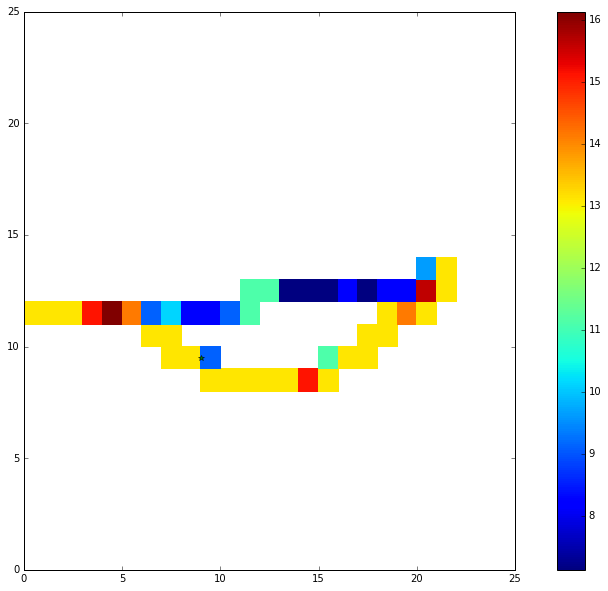

In [10]:
fig, ax = plt.subplots(1,1,figsize = (15,10))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(bathy[25:50,100:122])
ax.plot(108-100+1, 34-25+0.5,'g*')
plt.colorbar(mesh)

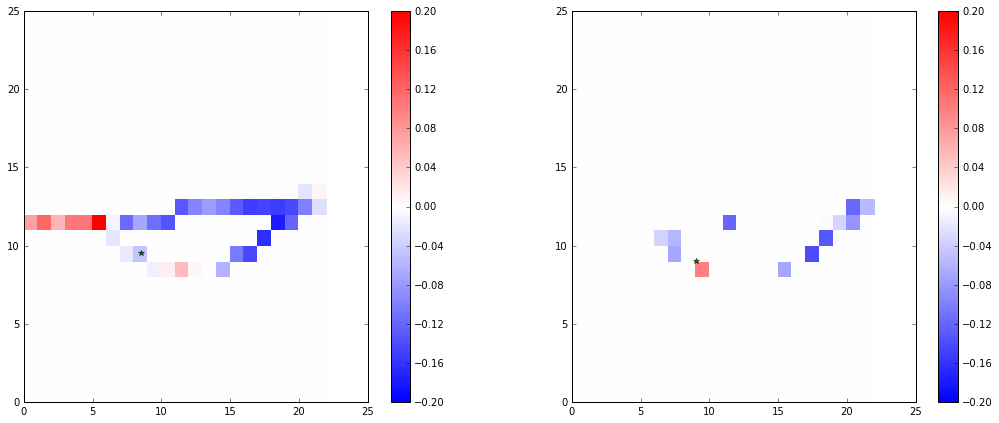

In [11]:
fig, ax = plt.subplots(1,2,figsize = (18,7))
viz_tools.set_aspect(ax[0])
mesh = ax[0].pcolormesh(u[-1,5,25:50, 100:122], cmap='bwr', vmin=-0.20, vmax=0.20)
ax[0].plot(108-100+0.5, 34-25+0.5,'g*')
plt.colorbar(mesh, ax=ax[0])
viz_tools.set_aspect(ax[1])
mesh = ax[1].pcolormesh(v[-1,5,25:50, 100:122], cmap='bwr', vmin=-0.20, vmax=0.20)
ax[1].plot(108-100+0.5+0.5, 34-25,'g*')
plt.colorbar(mesh, ax=ax[1])

In [12]:
abort = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/output.abort.nc')
u_abort = abort.variables['vozocrtx'][:]
v_abort = abort.variables['vomecrty'][:]
print (v_abort.shape)

(1, 40, 898, 398)


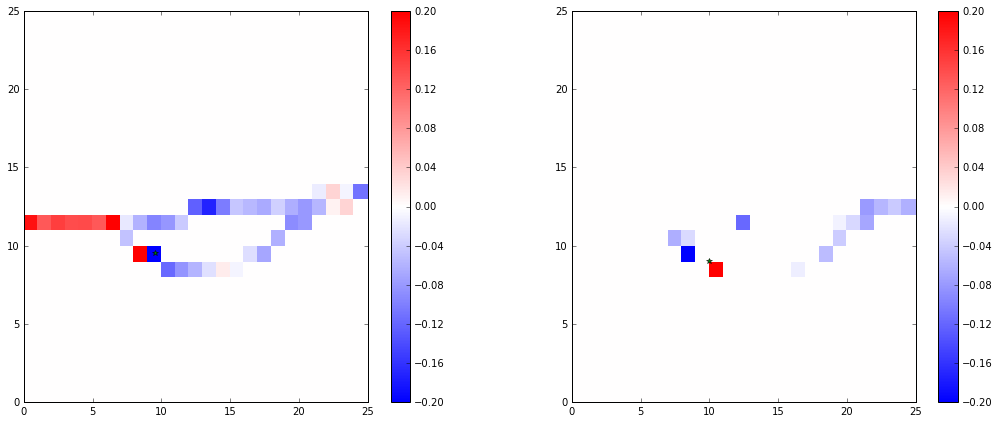

In [13]:
fig, ax = plt.subplots(1,2,figsize = (18,7))
viz_tools.set_aspect(ax[0])
mesh = ax[0].pcolormesh(u_abort[0, 5,414-9:414-9+25, 348-9:348-9+25], cmap='bwr', vmin=-0.20, vmax=0.20)
ax[0].plot(9+0.5, 9+0.5,'g*')
plt.colorbar(mesh, ax=ax[0])
viz_tools.set_aspect(ax[1])
mesh = ax[1].pcolormesh(v_abort[0, 5,414-9:414-9+25, 348-9:348-9+25], cmap='bwr', vmin=-0.20, vmax=0.20)
ax[1].plot(9+0.5+0.5, 9,'g*')
plt.colorbar(mesh, ax=ax[1])

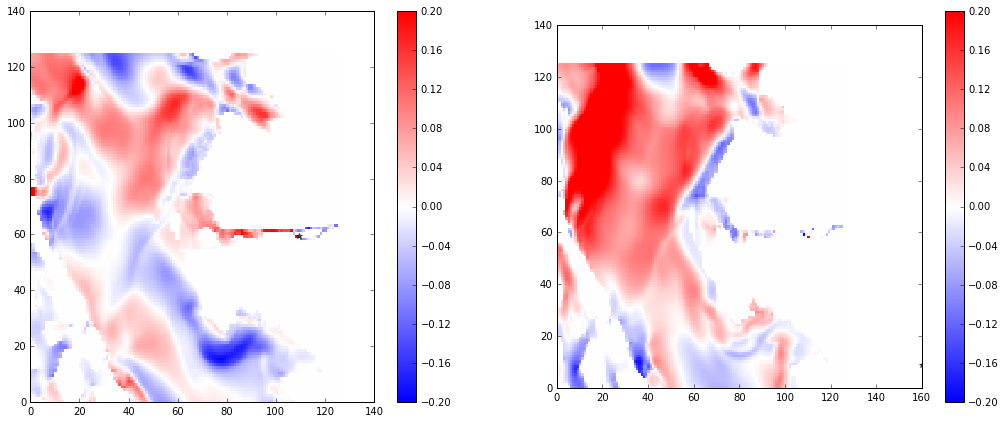

In [14]:
fig, ax = plt.subplots(1,2,figsize = (18,7))
viz_tools.set_aspect(ax[0])
mesh = ax[0].pcolormesh(u_abort[0, 5,414-9-50:414-9+25+50, 348-9-100:348-9+25], cmap='bwr', vmin=-0.20, vmax=0.20)
ax[0].plot(9+100+0.5, 9+50+0.5,'g*')
plt.colorbar(mesh, ax=ax[0])
viz_tools.set_aspect(ax[1])
mesh = ax[1].pcolormesh(v_abort[0, 5,414-9-50:414-9+25+50, 348-9-100:348-9+25], cmap='bwr', vmin=-0.20, vmax=0.20)
ax[1].plot(9+100+0.5+50+0.5, 9,'g*')
plt.colorbar(mesh, ax=ax[1])

In [15]:
ssh_abort = abort.variables['sossheig'][:]
w_abort = abort.variables['vovecrtz'][:]
s_abort = abort.variables['vosaline'][:]

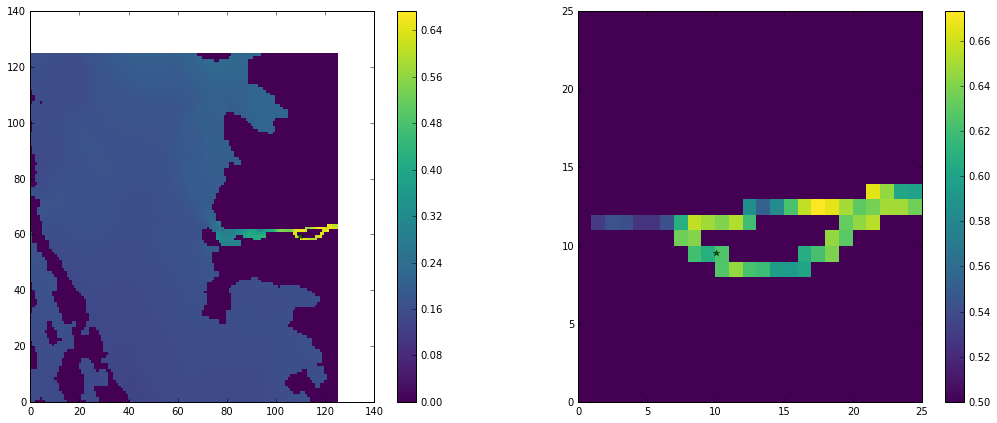

In [16]:
fig, ax = plt.subplots(1,2,figsize = (18,7))
viz_tools.set_aspect(ax[0])
mesh = ax[0].pcolormesh(ssh_abort[0,414-9-50:414-9+25+50, 348-9-100:348-9+25], cmap='viridis')
ax[0].plot(9+100+0.5+0.5, 9+50+0.5,'g*')
plt.colorbar(mesh, ax=ax[0])
viz_tools.set_aspect(ax[1])
mesh = ax[1].pcolormesh(ssh_abort[0,414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmin=0.50)
ax[1].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[1])

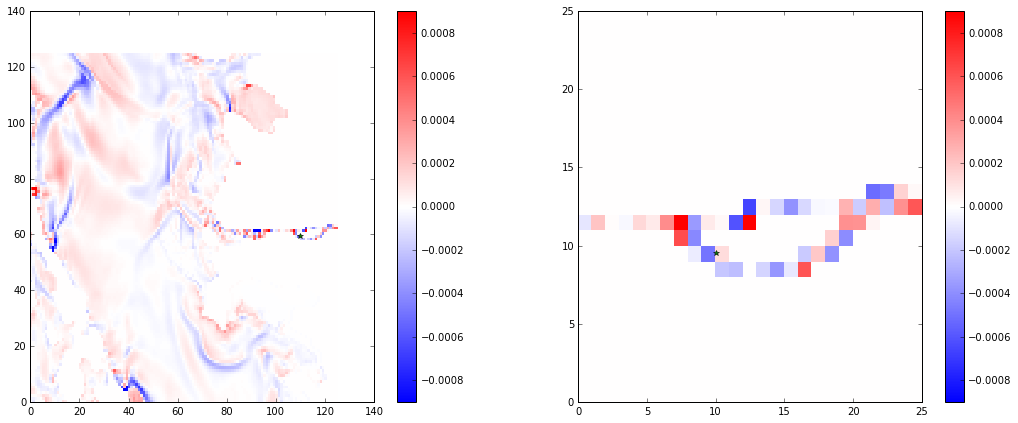

In [17]:
fig, ax = plt.subplots(1,2,figsize = (18,7))
viz_tools.set_aspect(ax[0])
mesh = ax[0].pcolormesh(w_abort[0, 3, 414-9-50:414-9+25+50, 348-9-100:348-9+25], cmap='bwr', vmin=-9e-4,
                       vmax = 9e-4)
ax[0].plot(9+100+0.5+0.5, 9+50+0.5,'g*')
plt.colorbar(mesh, ax=ax[0])
viz_tools.set_aspect(ax[1])
mesh = ax[1].pcolormesh(w_abort[0, 3, 414-9:414-9+25, 348-9:348-9+25], cmap='bwr', vmin=-9e-4,
                       vmax = 9e-4)
ax[1].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[1])

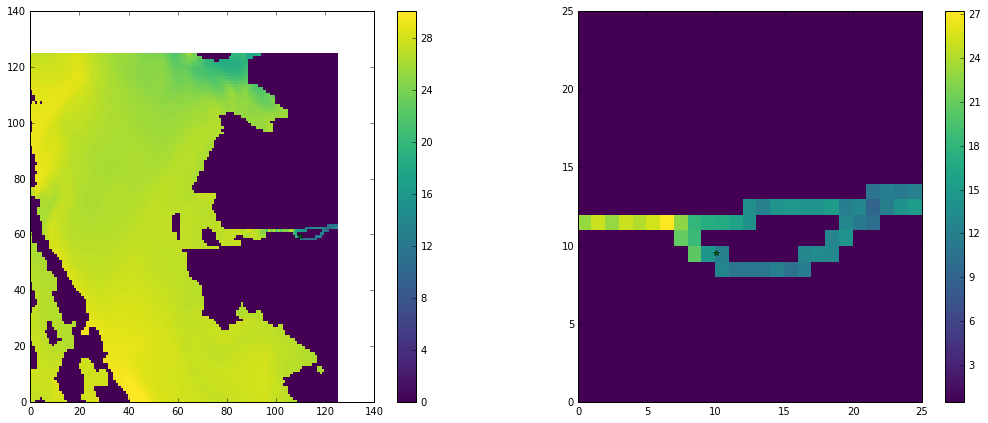

In [18]:
fig, ax = plt.subplots(1,2,figsize = (18,7))
viz_tools.set_aspect(ax[0])
mesh = ax[0].pcolormesh(s_abort[0, 5, 414-9-50:414-9+25+50, 348-9-100:348-9+25], cmap='viridis')
ax[0].plot(9+100+0.5+0.5, 9+50+0.5,'g*')
plt.colorbar(mesh, ax=ax[0])
viz_tools.set_aspect(ax[1])
mesh = ax[1].pcolormesh(s_abort[0, 5, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmin=0.50)
ax[1].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[1])

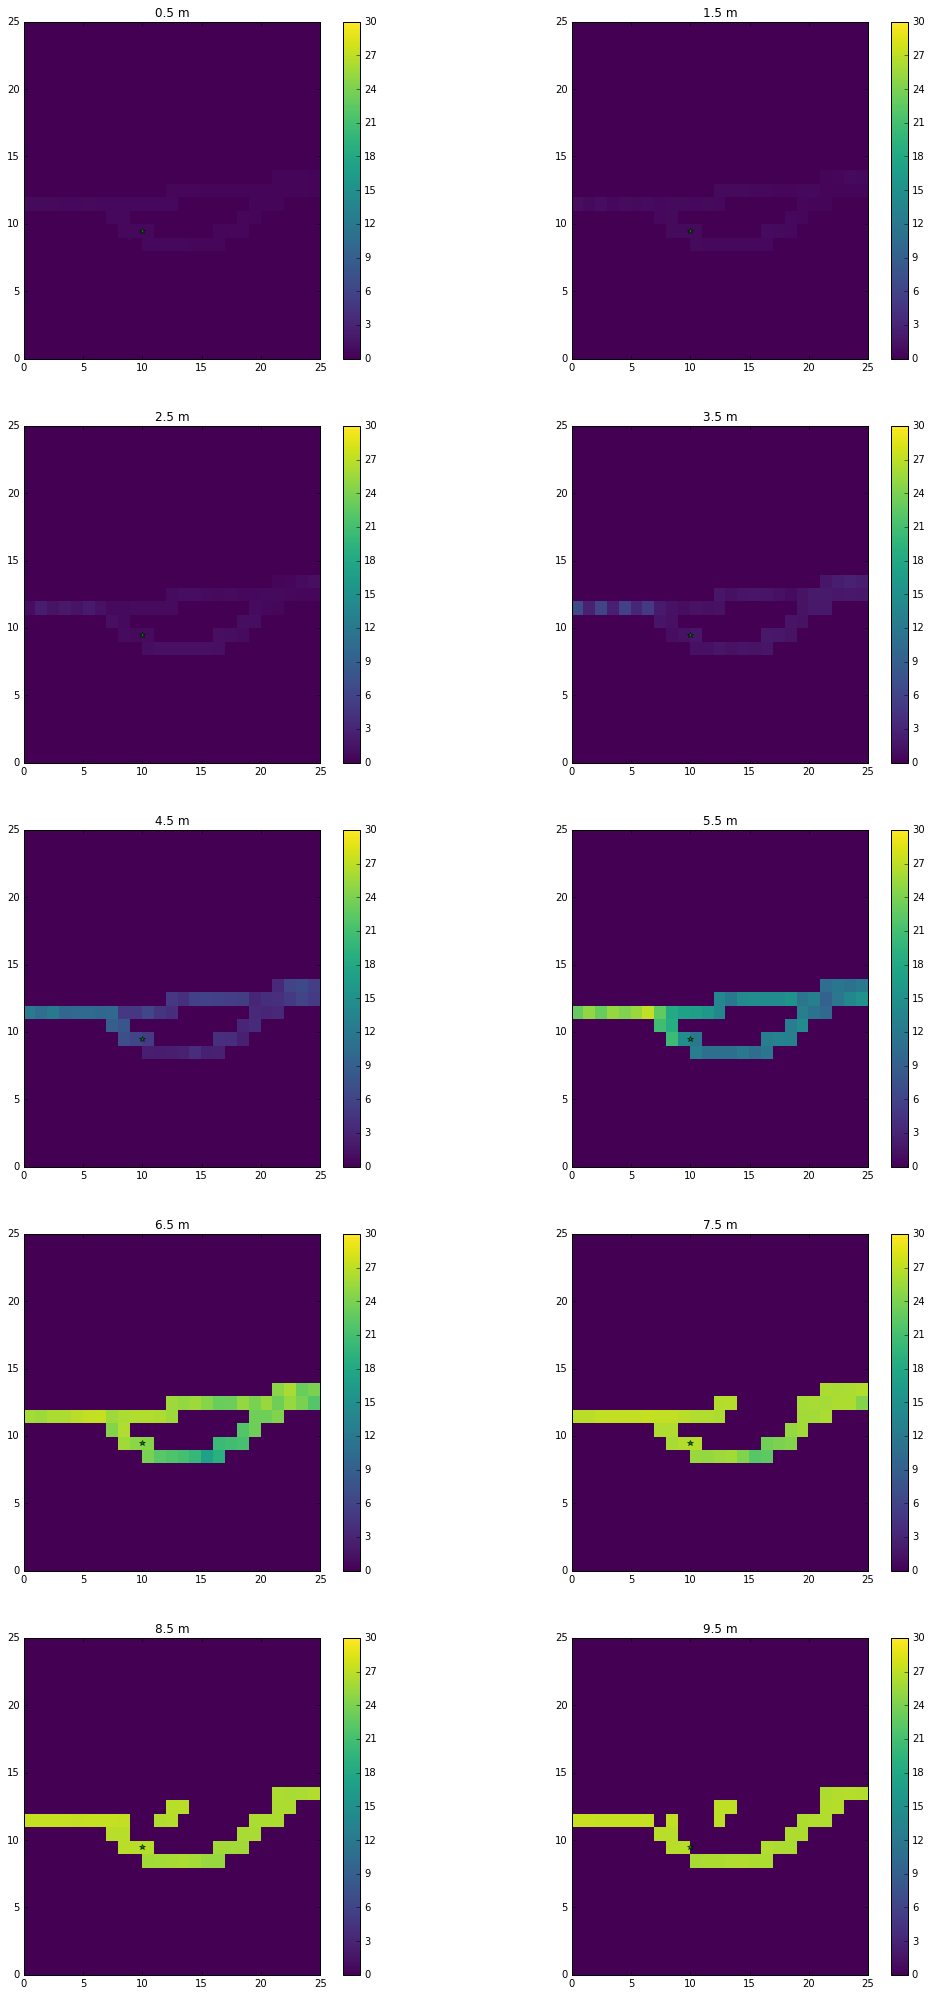

In [19]:
fig, ax = plt.subplots(5,2,figsize = (18, 35))
vmax = 30
viz_tools.set_aspect(ax[0, 0])
mesh = ax[0, 0].pcolormesh(s_abort[0, 0, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmax=vmax)
ax[0, 0].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[0, 0])
ax[0,0].set_title('0.5 m')

viz_tools.set_aspect(ax[0, 1])
mesh = ax[0, 1].pcolormesh(s_abort[0, 1, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmax=vmax)
ax[0, 1].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[0, 1])
ax[0, 1].set_title('1.5 m')

viz_tools.set_aspect(ax[1, 0])
mesh = ax[1, 0].pcolormesh(s_abort[0, 2, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmax=vmax)
ax[1, 0].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[1, 0])
ax[1, 0].set_title('2.5 m')

viz_tools.set_aspect(ax[1, 1])
mesh = ax[1, 1].pcolormesh(s_abort[0, 3, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmax=vmax)
ax[1, 1].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[1, 1])
ax[1, 1].set_title('3.5 m')

viz_tools.set_aspect(ax[2, 0])
mesh = ax[2, 0].pcolormesh(s_abort[0, 4, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmax=vmax)
ax[2, 0].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[2, 0])
ax[2, 0].set_title('4.5 m')

viz_tools.set_aspect(ax[2, 1])
mesh = ax[2, 1].pcolormesh(s_abort[0, 5, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmax=vmax)
ax[2, 1].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[2, 1])
ax[2, 1].set_title('5.5 m')

viz_tools.set_aspect(ax[3, 0])
mesh = ax[3, 0].pcolormesh(s_abort[0, 6, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmax=vmax)
ax[3, 0].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[3, 0])
ax[3, 0].set_title('6.5 m')

viz_tools.set_aspect(ax[3, 1])
mesh = ax[3, 1].pcolormesh(s_abort[0, 7, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmax=vmax)
ax[3, 1].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[3, 1])
ax[3, 1].set_title('7.5 m')

viz_tools.set_aspect(ax[4, 0])
mesh = ax[4, 0].pcolormesh(s_abort[0, 8, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmax=vmax)
ax[4, 0].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[4, 0])
ax[4, 0].set_title('8.5 m')

viz_tools.set_aspect(ax[4, 1])
mesh = ax[4, 1].pcolormesh(s_abort[0, 9, 414-9:414-9+25, 348-9:348-9+25], cmap='viridis', vmax=vmax)
ax[4, 1].plot(9+0.5+0.5, 9+0.5, 'g*')
plt.colorbar(mesh, ax=ax[4, 1])
ax[4, 1].set_title('9.5 m')

0.629312 26.9053


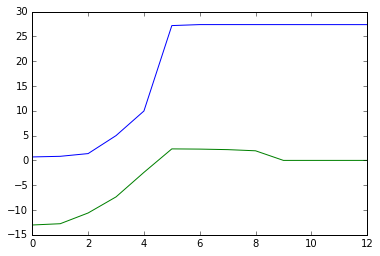

In [20]:
plt.plot(s_abort[0, :13, 416, 345])
plt.plot(u_abort[0, :13, 416, 345]*10)
print (s_abort[0, 0, 414, 348], s_abort[0, 12, 414, 348])

In [21]:
# densities (assuming 10 degrees C are 1000.2 and 1020.6)
c = np.sqrt(9.8*20.4/1000.*12.5)
print (c)

1.58082257069


In [22]:
440/10.

44.0

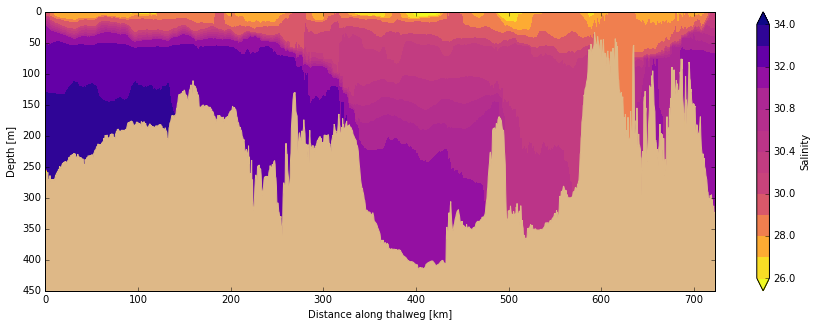

In [29]:
lons = grid6.variables['nav_lon'][:]
lats = grid6.variables['nav_lat'][:]
bathy_full = grid6.variables['Bathymetry'][:]
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc') # cause no bathy6
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, s_abort[0], bathy_full, lons, lats, mesh_mask, 'gdept', 'salinity', cmap='plasma_r')
ax.set_ylim([450,0])
cbar.set_label('Salinity')